In [5]:
!python --version

Python 3.6.5 :: Anaconda custom (64-bit)


Importing the important libraries

In [6]:
import boto3
import pandas as pd
from sagemaker import get_execution_role
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Getting the car data from S3

In [7]:
role = get_execution_role()
bucket='<YOUR_BUCKET_NAME_HERE>'
data_key = 'car_data.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
print(data_location)

s3://car-data-analysis-acg/car_data.csv


In [8]:
df = pd.read_csv(data_location)

In [10]:
df.head()

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5


Let's build out our box plot

In [11]:
df_vet = df[df['car'] == 'Corvette']
df_mustang = df[df['car'] == 'Mustang']
df_camaro = df[df['car'] == 'Camaro']


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


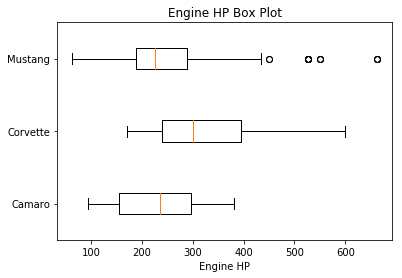

In [13]:
data = [df_camaro['engine_hp'], df_vet['engine_hp'], df_mustang['engine_hp']]
plt.boxplot(data, vert=False)
plt.title('Engine HP Box Plot')
plt.xlabel('Engine HP')
plt.yticks([1, 2, 3], ['Camaro', 'Corvette', 'Mustang'])
plt.show()